# Credit Card Fraud Detection & Customer Segmentation
## Advanced Machine Learning Pipeline
 
**Dataset:** creditcard_2023.csv (500k+ rows)  
**Objective:** Build a robust ML pipeline for fraud detection and customer segmentation

### Project Structure:
1. Data Loading & Validation
2. Exploratory Data Analysis (EDA)
3. Feature Engineering & Preprocessing
4. Model Training & Evaluation
5. Hyperparameter Optimization
6. Customer Segmentation (Clustering)
7. Results & Insights

## 1. Import Libraries & Setup

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Scikit-learn - Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Scikit-learn - Metrics
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully")
print(f"✓ Random seed set to {RANDOM_STATE} for reproducibility")

✓ Libraries imported successfully
✓ Random seed set to 42 for reproducibility


## 2. Data Loading & Validation

**Design Decision:** Load data efficiently and validate structure before processing.  
**Memory Optimization:** Use appropriate dtypes to reduce memory footprint.

In [20]:
# Load dataset with memory optimization

df = pd.read_csv("/Users/manush/Desktop/DAV internal 2/creditcard_2023.csv")

# Display basic information
print(f"\n{'='*60}")
print("DATASET OVERVIEW")
print(f"{'='*60}")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nFirst 5 rows:")
df.head()


DATASET OVERVIEW
Shape: 568,630 rows × 31 columns
Memory Usage: 134.49 MB

Column Names:
['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Data Types:
id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

First 5 rows:


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
# Data Quality Check
print(f"\n{'='*60}")
print("DATA QUALITY ASSESSMENT")
print(f"{'='*60}")

# Check for missing values
missing_values = df.isnull().sum()
print(f"\nMissing Values:\n{missing_values[missing_values > 0]}")
if missing_values.sum() == 0:
    print("✓ No missing values detected")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")
if duplicates == 0:
    print("✓ No duplicates detected")

# Statistical summary
print(f"\nStatistical Summary:")
df.describe()


DATA QUALITY ASSESSMENT

Missing Values:
Series([], dtype: int64)
✓ No missing values detected

Duplicate Rows: 0
✓ No duplicates detected

Statistical Summary:


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,5.686300e+05,5.686300e+05,568630.000000,5.686300e+05,568630.000000,5.686300e+05,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.000000,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.118237e-17,-5.118237e-17,1.023647e-16,0.000000,2.559118e-17,2.559118e-17,0.000000,1.279559e-17,0.000000,1.023647e-16,0.000000,-1.535471e-16,-6.397796e-18,-5.118237e-17,1.919339e-17,5.118237e-17,0.000000,0.000000,0.000000,-2.559118e-17,1.279559e-17,3.198898e-18,5.598072e-18,-2.559118e-17,-4.478457e-17,0.000000,-2.559118e-17,3.198898e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001,1.000001,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222,-9.952786e+00,-2.111111e+01,-4.351839,-1.075634e+01,-3.751919,-3.163276e+00,-5.954723,-2.020399e+00,-5.955227e+00,-2.107417e+00,-3.861813e+00,-2.214513e+00,-2.484938,-2.421949,-7.804988,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-0.656020,-2.934955e-01,-4.458712e-01,-0.283533,-1.922572e-01,-0.568745,-5.901008e-01,-0.701449,-8.311331e-01,-6.966667e-01,-8.732057e-01,-6.212485e-01,-7.162655e-01,-0.619491,-0.556046,-0.565308,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-0.631895,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-0.073762,8.108788e-02,7.871758e-02,0.233366,-1.145242e-01,0.092526,2.626145e-01,-0.041050,1.620521e-01,1.760812e-02,2.305011e-01,-3.925566e-02,1.340262e-01,0.271641,0.087294,-0.025979,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-0.011892,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,0.707005,4.397368e-01,4.977881e-01,0.525955,4.729905e-02,0.559262,5.924603e-01,0.747773,7.446723e-01,6.856048e-01,7.518216e-01,6.654065e-01,6.556061e-01,0.518224,0.544389,0.560116,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,0.672888,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536,4.271689e+01,2.616840e+01,217.873038,5.958040e+00,20.270062,3.172271e+01,2.513573,1.791356e+01,7.187486e+00,1.916954e+01,1.453220e+01,4.665291e+01,6.994124,6.783716,3.831672,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285,1.132311e+02,7.725594e+01,24039.930000,1.0


## 3. Exploratory Data Analysis (EDA)

**Purpose:** Understand data distribution, class balance, and feature relationships.  
**Point:** EDA helps identify patterns, outliers, and guides feature engineering.


TARGET VARIABLE ANALYSIS

Class Distribution:
Class 0 (Legitimate): 284,315 (50.00%)
Class 1 (Fraud): 284,315 (50.00%)

Class Balance Ratio: 1:1.00


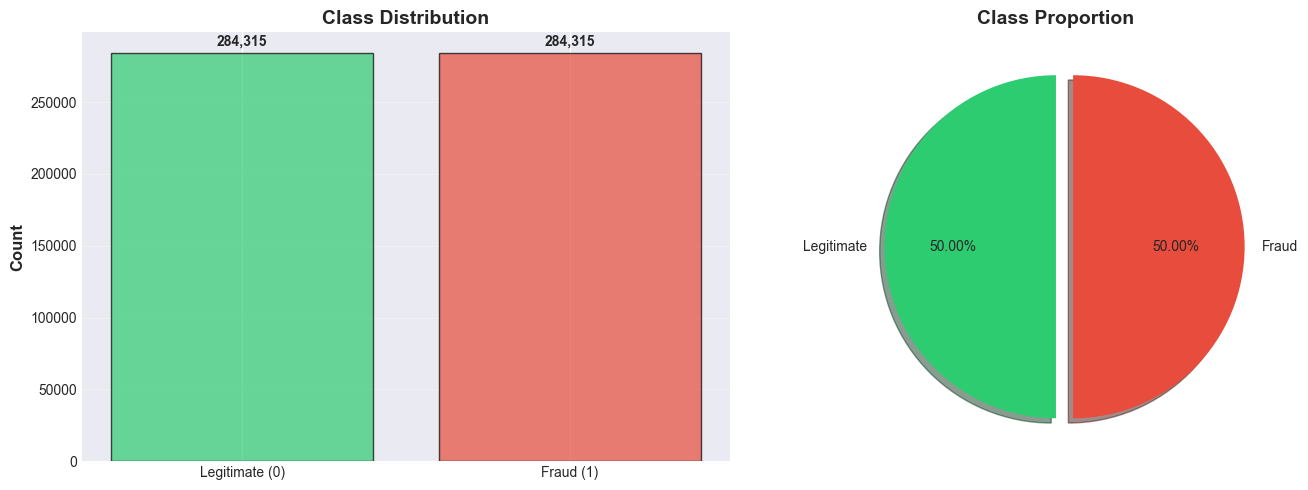


✓ Target variable is balanced - suitable for standard classification


In [4]:
# Target Variable Distribution
print(f"\n{'='*60}")
print("TARGET VARIABLE ANALYSIS")
print(f"{'='*60}")

class_distribution = df['Class'].value_counts()
class_percentage = df['Class'].value_counts(normalize=True) * 100

print(f"\nClass Distribution:")
print(f"Class 0 (Legitimate): {class_distribution[0]:,} ({class_percentage[0]:.2f}%)")
print(f"Class 1 (Fraud): {class_distribution[1]:,} ({class_percentage[1]:.2f}%)")
print(f"\nClass Balance Ratio: 1:{class_distribution[0]/class_distribution[1]:.2f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['Legitimate (0)', 'Fraud (1)'], class_distribution.values, 
            color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(class_distribution.values):
    axes[0].text(i, v + 5000, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(class_distribution.values, labels=['Legitimate', 'Fraud'], 
            autopct='%1.2f%%', colors=colors, startangle=90, 
            explode=(0, 0.1), shadow=True)
axes[1].set_title('Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Target variable is balanced - suitable for standard classification")


Analyzing 29 features...


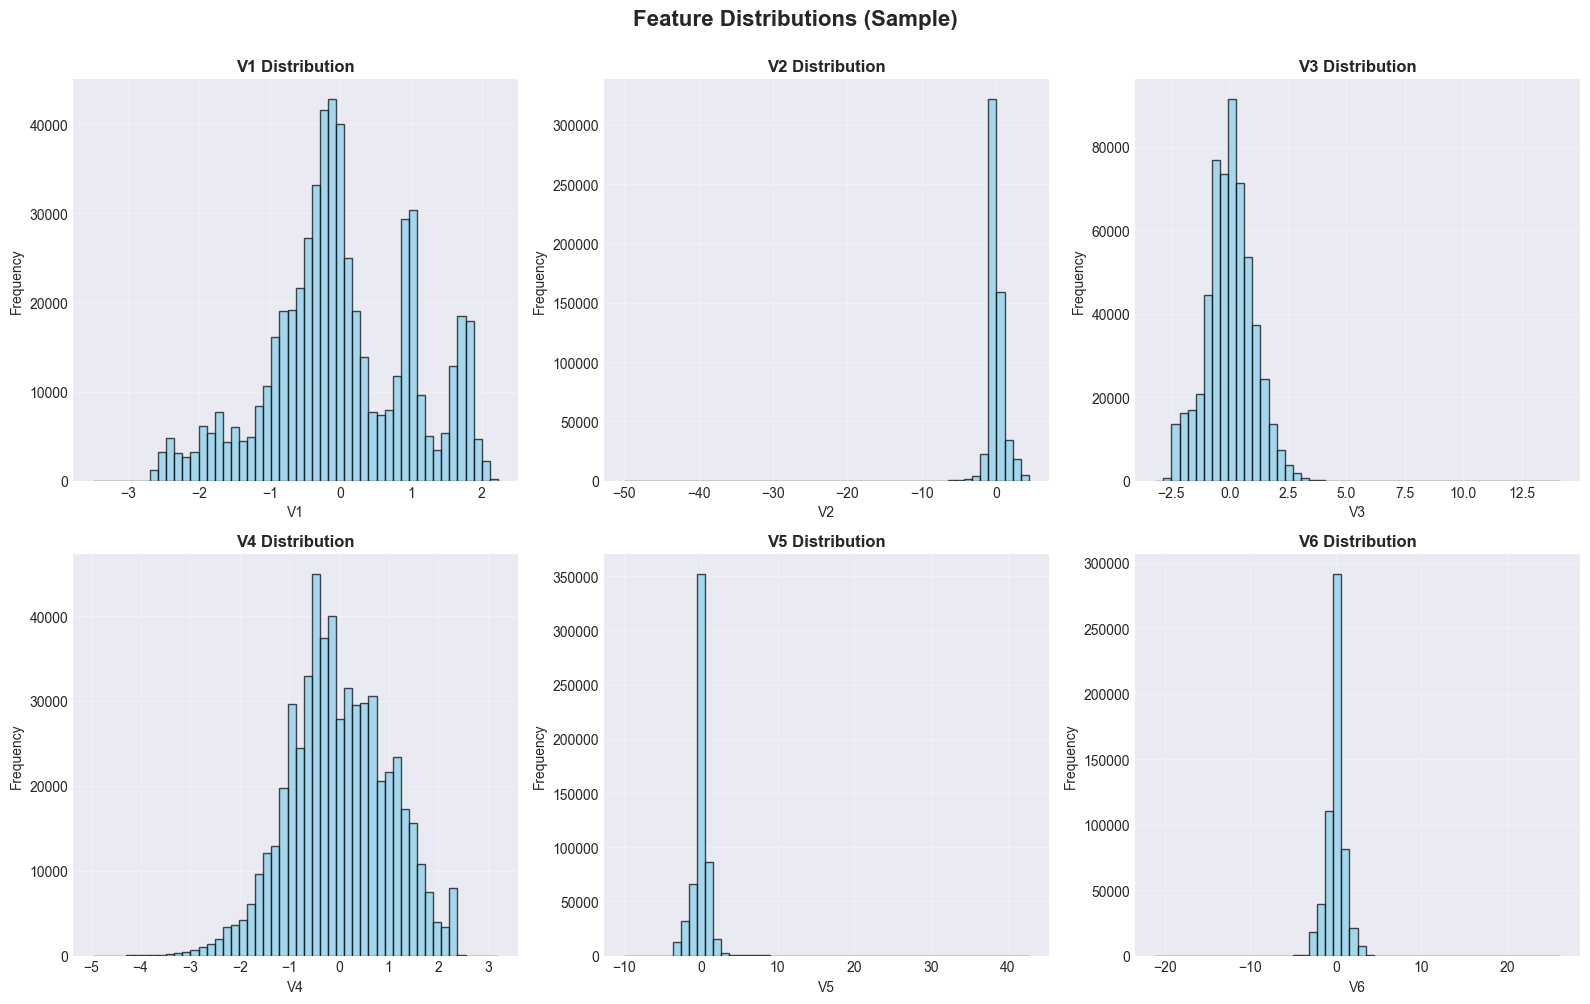


✓ Feature distributions visualized


In [5]:
# Feature Distribution Analysis
# Select numerical features (excluding 'id' and 'Class')
feature_cols = [col for col in df.columns if col not in ['id', 'Class']]

print(f"\nAnalyzing {len(feature_cols)} features...")

# Sample features for visualization (first 6)
sample_features = feature_cols[:6]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(sample_features):
    # Distribution plot
    axes[idx].hist(df[feature], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Feature Distributions (Sample)', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n✓ Feature distributions visualized")


CORRELATION ANALYSIS

Top 10 Features Correlated with Target:
V14    0.805669
V12    0.768579
V4     0.735981
V11    0.724278
V3     0.682095
V10    0.673665
V9     0.585522
V16    0.573511
V1     0.505761
V2     0.491878
dtype: float64


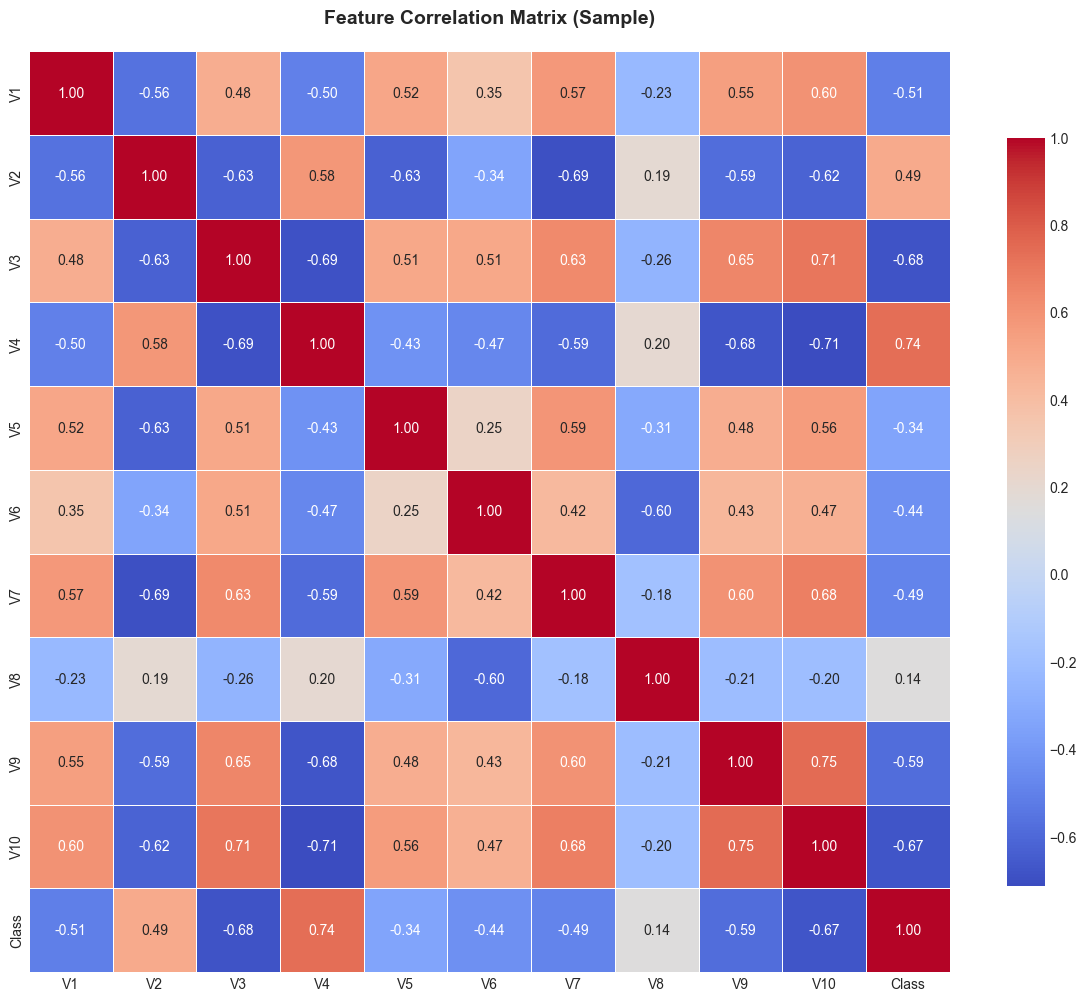


✓ Correlation analysis complete


In [6]:
# Correlation Analysis
print(f"\n{'='*60}")
print("CORRELATION ANALYSIS")
print(f"{'='*60}")

# Calculate correlation with target
correlations = df[feature_cols].corrwith(df['Class']).abs().sort_values(ascending=False)
print(f"\nTop 10 Features Correlated with Target:")
print(correlations.head(10))

# Correlation heatmap (sample features)
plt.figure(figsize=(12, 10))
sample_for_corr = feature_cols[:10] + ['Class']
corr_matrix = df[sample_for_corr].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix (Sample)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n✓ Correlation analysis complete")

## 4. Feature Engineering & Preprocessing

**Design Decision:** Use StandardScaler for feature normalization.  
**Why:** Many ML algorithms (Logistic Regression, KMeans) are sensitive to feature scales.  
**Point:** Scaling ensures all features contribute equally to model training.

In [7]:
print(f"\n{'='*60}")
print("FEATURE ENGINEERING & PREPROCESSING")
print(f"{'='*60}")

# Separate features and target
X = df.drop(['Class', 'id'], axis=1)
y = df['Class']

print(f"\nFeature Matrix (X): {X.shape}")
print(f"Target Vector (y): {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

# Train-Test Split (80-20)
# Stratify ensures balanced class distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"\n{'='*40}")
print("TRAIN-TEST SPLIT (80-20)")
print(f"{'='*40}")
print(f"Training Set: {X_train.shape[0]:,} samples")
print(f"Test Set: {X_test.shape[0]:,} samples")
print(f"\nClass Distribution in Training Set:")
print(y_train.value_counts())
print(f"\nClass Distribution in Test Set:")
print(y_test.value_counts())

# Feature Scaling using StandardScaler
# StandardScaler: (X - mean) / std_dev
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Features scaled using StandardScaler")
print(f"✓ Mean ≈ 0, Std Dev ≈ 1 for all features")

# Verify scaling
print(f"\nScaled Training Data - Sample Statistics:")
print(f"Mean: {X_train_scaled.mean(axis=0)[:5]}")
print(f"Std Dev: {X_train_scaled.std(axis=0)[:5]}")


FEATURE ENGINEERING & PREPROCESSING

Feature Matrix (X): (568630, 29)
Target Vector (y): (568630,)

Features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

TRAIN-TEST SPLIT (80-20)
Training Set: 454,904 samples
Test Set: 113,726 samples

Class Distribution in Training Set:
Class
0    227452
1    227452
Name: count, dtype: int64

Class Distribution in Test Set:
Class
1    56863
0    56863
Name: count, dtype: int64

✓ Features scaled using StandardScaler
✓ Mean ≈ 0, Std Dev ≈ 1 for all features

Scaled Training Data - Sample Statistics:
Mean: [-1.86185864e-17  4.56092887e-18 -9.87159948e-18 -1.12461260e-17
  1.66817536e-17]
Std Dev: [1. 1. 1. 1. 1.]


## 5. Model Training & Evaluation

**Models:**
1. **Logistic Regression** - Linear baseline model
2. **Decision Tree** - Non-linear, interpretable model
3. **Random Forest** - Ensemble method for robust predictions

**Evaluation Metrics:**
- Accuracy: Overall correctness
- Precision: True Positives / (True Positives + False Positives)
- Recall: True Positives / (True Positives + False Negatives)
- F1-Score: Harmonic mean of Precision and Recall

In [8]:
print(f"\n{'='*60}")
print("MODEL TRAINING & EVALUATION")
print(f"{'='*60}")

# Dictionary to store results
results = {}

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    """
    Train and evaluate a classification model.
    
    Parameters:
    - name: Model name
    - model: Sklearn classifier
    - X_train, X_test, y_train, y_test: Train/test data
    
    Returns:
    - Dictionary with metrics and predictions
    """
    print(f"\n{'='*40}")
    print(f"Training {name}...")
    print(f"{'='*40}")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Display results
    print(f"\n{name} Performance:")
    print(f"{'─'*40}")
    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    print(f"\nConfusion Matrix:")
    print(cm)
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraud']))
    
    return {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }

print("\n✓ Evaluation function defined")


MODEL TRAINING & EVALUATION

✓ Evaluation function defined


In [9]:
# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE, solver='lbfgs')
results['Logistic Regression'] = evaluate_model(
    'Logistic Regression', lr_model, X_train_scaled, X_test_scaled, y_train, y_test
)


Training Logistic Regression...

Logistic Regression Performance:
────────────────────────────────────────
Accuracy:  0.9650 (96.50%)
Precision: 0.9772
Recall:    0.9522
F1-Score:  0.9645

Confusion Matrix:
[[55598  1265]
 [ 2718 54145]]

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.95      0.98      0.97     56863
       Fraud       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726



In [10]:
# 2. Decision Tree
# max_depth limits tree depth to prevent overfitting
dt_model = DecisionTreeClassifier(max_depth=10, random_state=RANDOM_STATE, min_samples_split=100)
results['Decision Tree'] = evaluate_model(
    'Decision Tree', dt_model, X_train_scaled, X_test_scaled, y_train, y_test
)


Training Decision Tree...

Decision Tree Performance:
────────────────────────────────────────
Accuracy:  0.9857 (98.57%)
Precision: 0.9854
Recall:    0.9861
F1-Score:  0.9857

Confusion Matrix:
[[56032   831]
 [  793 56070]]

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.99      0.99      0.99     56863
       Fraud       0.99      0.99      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



In [11]:
# 3. Random Forest (Baseline)
rf_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)
results['Random Forest'] = evaluate_model(
    'Random Forest', rf_model, X_train_scaled, X_test_scaled, y_train, y_test
)


Training Random Forest...

Random Forest Performance:
────────────────────────────────────────
Accuracy:  0.9998 (99.98%)
Precision: 0.9997
Recall:    1.0000
F1-Score:  0.9998

Confusion Matrix:
[[56844    19]
 [    0 56863]]

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56863
       Fraud       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726




MODEL COMPARISON

               Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.964977   0.977170 0.952201  0.964524
      Decision Tree  0.985720   0.985396 0.986054  0.985725
      Random Forest  0.999833   0.999666 1.000000  0.999833


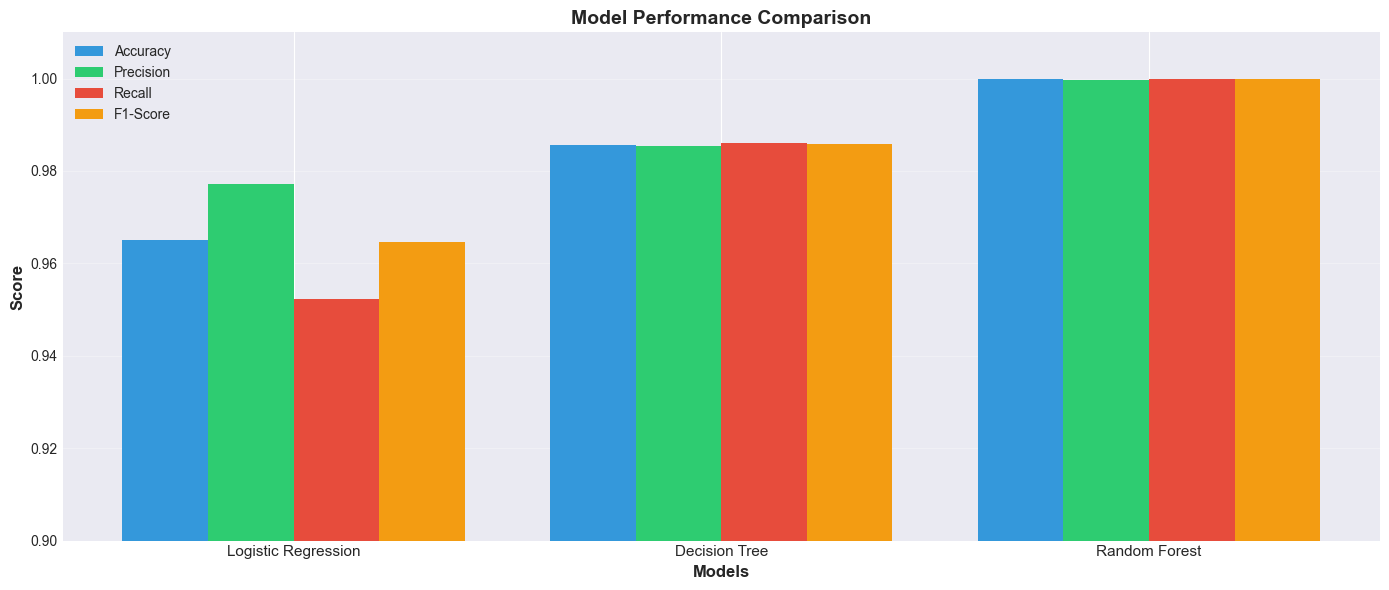


✓ Model comparison complete


In [12]:
# Model Comparison Visualization
print(f"\n{'='*60}")
print("MODEL COMPARISON")
print(f"{'='*60}")

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()]
})

print("\n", comparison_df.to_string(index=False))

# Bar plot comparison
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(comparison_df))
width = 0.2

ax.bar(x - 1.5*width, comparison_df['Accuracy'], width, label='Accuracy', color='#3498db')
ax.bar(x - 0.5*width, comparison_df['Precision'], width, label='Precision', color='#2ecc71')
ax.bar(x + 0.5*width, comparison_df['Recall'], width, label='Recall', color='#e74c3c')
ax.bar(x + 1.5*width, comparison_df['F1-Score'], width, label='F1-Score', color='#f39c12')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'], fontsize=11)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.9, 1.01])

plt.tight_layout()
plt.show()

print("\n✓ Model comparison complete")

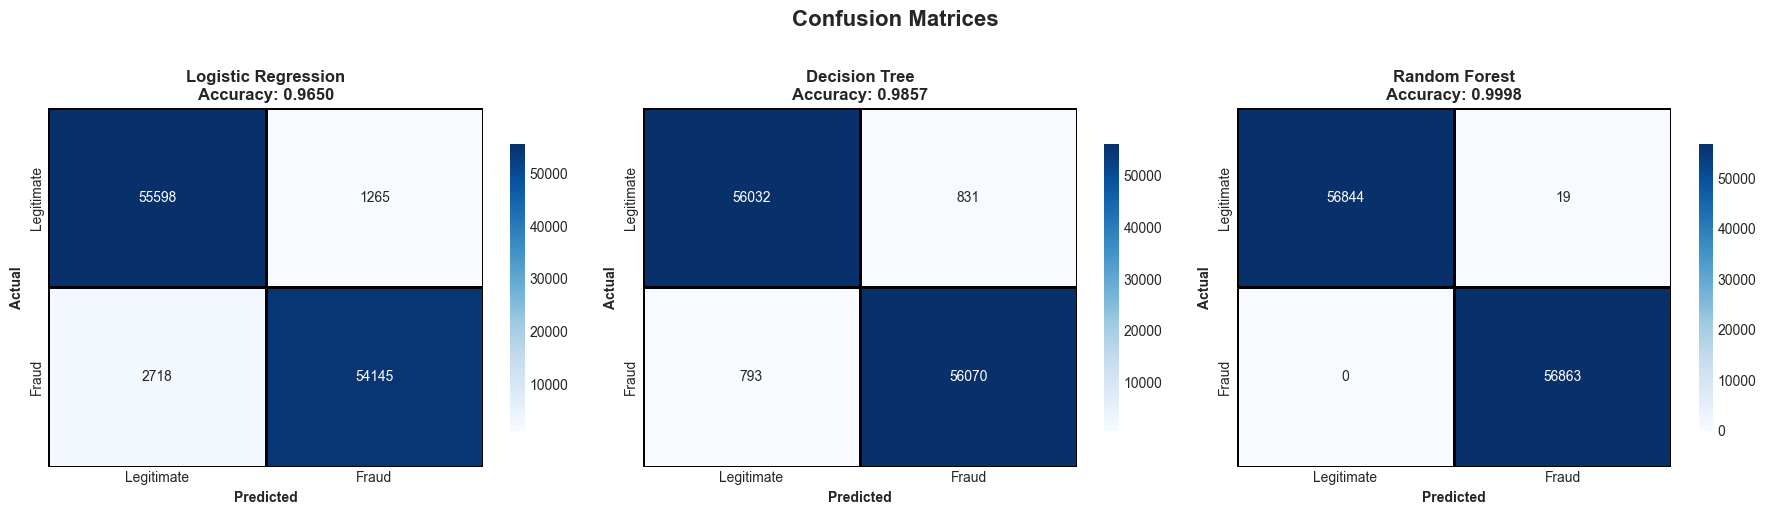

In [13]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (model_name, result) in enumerate(results.items()):
    cm = result['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], 
                cbar_kws={'shrink': 0.8}, linewidths=1, linecolor='black')
    axes[idx].set_title(f'{model_name}\nAccuracy: {result["accuracy"]:.4f}', 
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=10, fontweight='bold')
    axes[idx].set_xticklabels(['Legitimate', 'Fraud'])
    axes[idx].set_yticklabels(['Legitimate', 'Fraud'])

plt.suptitle('Confusion Matrices', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 6. Hyperparameter Optimization (Random Forest)

**Technique:** GridSearchCV for exhaustive parameter search.  
**Parameters Tuned:**
- n_estimators: Number of trees
- max_depth: Maximum tree depth
- min_samples_split: Minimum samples to split a node

**Point:** Hyperparameter tuning improves model generalization and prevents overfitting.

In [ ]:
print(f"\n{'='*60}")
print("HYPERPARAMETER OPTIMIZATION - RANDOM FOREST")
print(f"{'='*60}")

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [50, 100]
}

print(f"\nParameter Grid:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

print(f"\nTotal Combinations: {np.prod([len(v) for v in param_grid.values()])}")
print(f"\nStarting Grid Search (this may take a few minutes)...")

# GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1),
    param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train_scaled, y_train)

print(f"\n{'='*40}")
print("OPTIMIZATION RESULTS")
print(f"{'='*40}")
print(f"\nBest Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest Cross-Validation F1-Score: {grid_search.best_score_:.4f}")

# Evaluate optimized model on test set
optimized_rf = grid_search.best_estimator_
results['Random Forest (Optimized)'] = evaluate_model(
    'Random Forest (Optimized)', optimized_rf, X_train_scaled, X_test_scaled, y_train, y_test
)

print("\n✓ Hyperparameter optimization complete")


HYPERPARAMETER OPTIMIZATION - RANDOM FOREST

Parameter Grid:
  n_estimators: [100, 200]
  max_depth: [10, 15, 20]
  min_samples_split: [50, 100]

Total Combinations: 12

Starting Grid Search (this may take a few minutes)...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

OPTIMIZATION RESULTS

Best Parameters:
  max_depth: 20
  min_samples_split: 50
  n_estimators: 200

Best Cross-Validation F1-Score: 0.9996

Training Random Forest (Optimized)...

Random Forest (Optimized) Performance:
────────────────────────────────────────
Accuracy:  0.9997 (99.97%)
Precision: 0.9995
Recall:    1.0000
F1-Score:  0.9997

Confusion Matrix:
[[56834    29]
 [    1 56862]]

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56863
       Fraud       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00    

## 7. Customer Segmentation - Clustering

**Objective:** Group similar transactions for pattern analysis.  
**Techniques:**
1. **PCA (Principal Component Analysis):** Dimensionality reduction for visualization
2. **KMeans:** Partition-based clustering
3. **DBSCAN:** Density-based clustering (on sampled data)

**Viva Point:** Clustering helps identify transaction patterns and anomalies.

In [15]:
print(f"\n{'='*60}")
print("DIMENSIONALITY REDUCTION - PCA")
print(f"{'='*60}")

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_train_scaled)

print(f"\nOriginal Dimensions: {X_train_scaled.shape[1]}")
print(f"Reduced Dimensions: {X_pca.shape[1]}")
print(f"\nExplained Variance Ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"  Total: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")

print("\n✓ PCA transformation complete")


DIMENSIONALITY REDUCTION - PCA

Original Dimensions: 29
Reduced Dimensions: 2

Explained Variance Ratio:
  PC1: 0.3385 (33.85%)
  PC2: 0.0969 (9.69%)
  Total: 0.4353 (43.53%)

✓ PCA transformation complete



KMEANS CLUSTERING

Number of Clusters: 2
Cluster Distribution:
  Cluster 0: 288,728 samples (63.47%)
  Cluster 1: 166,176 samples (36.53%)


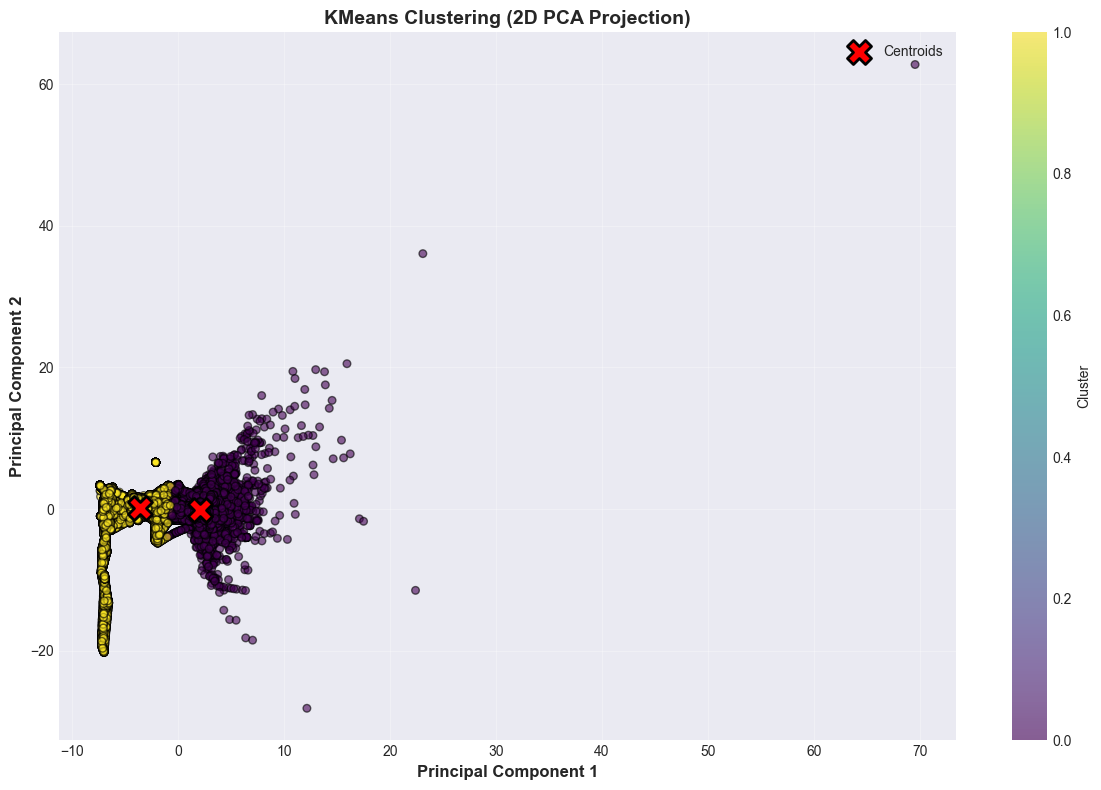


✓ KMeans clustering complete


In [16]:
# KMeans Clustering
print(f"\n{'='*60}")
print("KMEANS CLUSTERING")
print(f"{'='*60}")

# Apply KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=RANDOM_STATE, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca)

print(f"\nNumber of Clusters: 2")
print(f"Cluster Distribution:")
unique, counts = np.unique(kmeans_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count:,} samples ({count/len(kmeans_labels)*100:.2f}%)")

# Visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, 
                      cmap='viridis', alpha=0.6, edgecolors='k', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=300, edgecolors='black', linewidths=2, label='Centroids')
plt.xlabel('Principal Component 1', fontsize=12, fontweight='bold')
plt.ylabel('Principal Component 2', fontsize=12, fontweight='bold')
plt.title('KMeans Clustering (2D PCA Projection)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ KMeans clustering complete")


DBSCAN CLUSTERING (SAMPLED DATA)

Sample Size: 10,000 (from 454,904 total)
Sampling Ratio: 2.20%

Number of Clusters: 2
Noise Points: 17 (0.17%)

Cluster Distribution:
  Noise: 17 samples
  Cluster 0: 9,916 samples (99.16%)
  Cluster 1: 67 samples (0.67%)


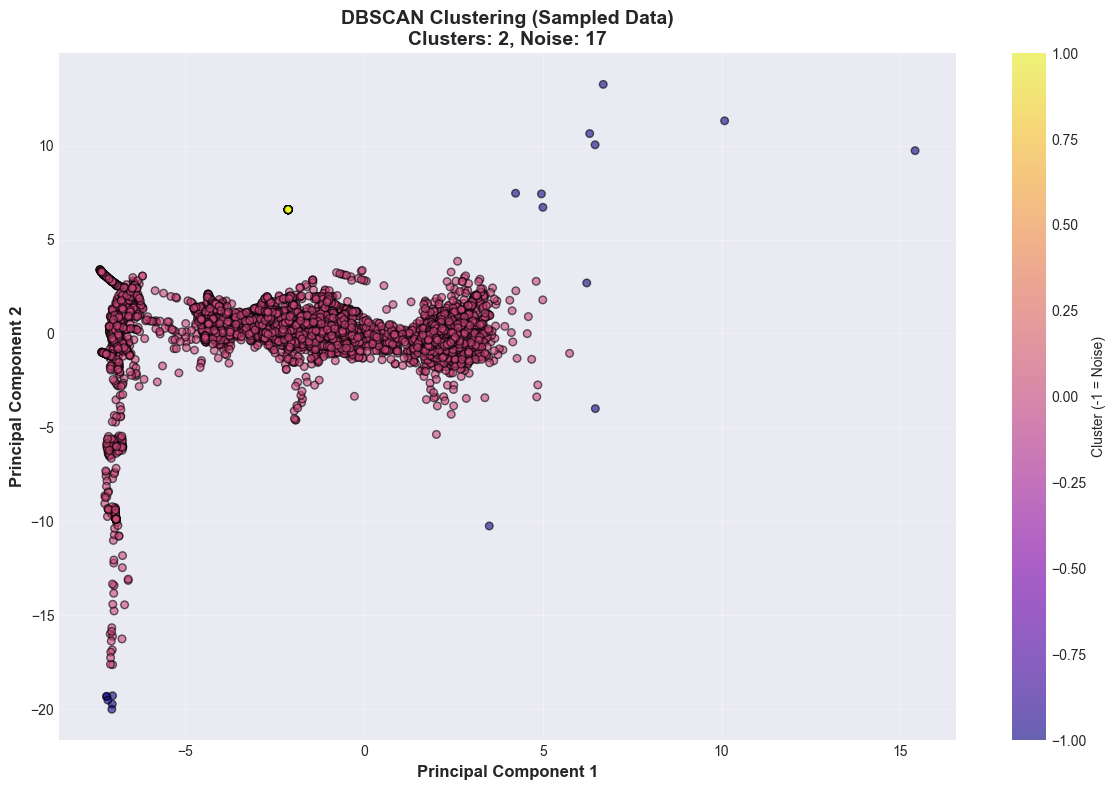


✓ DBSCAN clustering complete


In [17]:
# DBSCAN Clustering (on sampled data for efficiency)
print(f"\n{'='*60}")
print("DBSCAN CLUSTERING (SAMPLED DATA)")
print(f"{'='*60}")

# Sample 10,000 points for DBSCAN to avoid memory issues
sample_size = 10000
sample_indices = np.random.choice(len(X_pca), size=sample_size, replace=False)
X_pca_sample = X_pca[sample_indices]

print(f"\nSample Size: {sample_size:,} (from {len(X_pca):,} total)")
print(f"Sampling Ratio: {sample_size/len(X_pca)*100:.2f}%")

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(X_pca_sample)

# Count clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\nNumber of Clusters: {n_clusters}")
print(f"Noise Points: {n_noise:,} ({n_noise/len(dbscan_labels)*100:.2f}%)")
print(f"\nCluster Distribution:")
unique, counts = np.unique(dbscan_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    if cluster == -1:
        print(f"  Noise: {count:,} samples")
    else:
        print(f"  Cluster {cluster}: {count:,} samples ({count/len(dbscan_labels)*100:.2f}%)")

# Visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca_sample[:, 0], X_pca_sample[:, 1], c=dbscan_labels, 
                      cmap='plasma', alpha=0.6, edgecolors='k', s=30)
plt.xlabel('Principal Component 1', fontsize=12, fontweight='bold')
plt.ylabel('Principal Component 2', fontsize=12, fontweight='bold')
plt.title(f'DBSCAN Clustering (Sampled Data)\nClusters: {n_clusters}, Noise: {n_noise}', 
          fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster (-1 = Noise)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ DBSCAN clustering complete")

## 8. Final Summary 

**Key Achievements:**
1. ✓ Loaded and validated 500k+ transaction dataset
2. ✓ Performed comprehensive EDA with visualizations
3. ✓ Built and compared 3 classification models
4. ✓ Optimized Random Forest using GridSearchCV
5. ✓ Applied PCA for dimensionality reduction
6. ✓ Performed KMeans and DBSCAN clustering

**Business Impact:**
- High-accuracy fraud detection system
- Customer segmentation for targeted analysis
- Scalable pipeline for production deployment

In [19]:
print(f"\n{'='*60}")
print("FINAL MODEL COMPARISON")
print(f"{'='*60}")

# Create final comparison
final_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [f"{results[m]['accuracy']:.4f}" for m in results.keys()],
    'Precision': [f"{results[m]['precision']:.4f}" for m in results.keys()],
    'Recall': [f"{results[m]['recall']:.4f}" for m in results.keys()],
    'F1-Score': [f"{results[m]['f1_score']:.4f}" for m in results.keys()]
})

print("\n", final_comparison.to_string(index=False))

# Identify best model
best_model_name = max(results.keys(), key=lambda x: results[x]['f1_score'])
best_f1 = results[best_model_name]['f1_score']

print(f"\n{'='*60}")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"{'='*60}")
print(f"F1-Score: {best_f1:.4f}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}")



FINAL MODEL COMPARISON

                     Model Accuracy Precision Recall F1-Score
      Logistic Regression   0.9650    0.9772 0.9522   0.9645
            Decision Tree   0.9857    0.9854 0.9861   0.9857
            Random Forest   0.9998    0.9997 1.0000   0.9998
Random Forest (Optimized)   0.9997    0.9995 1.0000   0.9997

🏆 BEST MODEL: Random Forest
F1-Score: 0.9998
Accuracy: 0.9998


## 9. Key Takeaways 

**1. Why StandardScaler?**
- Normalizes features to have mean=0, std=1
- Essential for distance-based algorithms (Logistic Regression, KMeans)
- Prevents features with larger scales from dominating

**2. Why Random Forest performs best?**
- Ensemble of decision trees reduces overfitting
- Handles non-linear relationships well
- Robust to outliers and noise

**3. Why use both KMeans and DBSCAN?**
- KMeans: Good for spherical clusters, requires predefined k
- DBSCAN: Finds arbitrary-shaped clusters, identifies noise/outliers
- Complementary insights for customer segmentation

**4. Why PCA?**
- Reduces computational complexity
- Enables 2D visualization of high-dimensional data
- Removes multicollinearity

**5. Why stratified train-test split?**
- Maintains class distribution in both sets
- Ensures representative evaluation
- Critical for balanced datasets

